In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import rcParams
# rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', family='Malgun Gothic')
#plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy

from datetime import datetime

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
["NanumGothic" in f]

[False]

In [2]:
naver_df = pd.read_csv('../DAOU/naver2.csv', encoding='euc-kr')

In [3]:
naver_df.info()
naver_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   사업장명                    5438 non-null   object 
 1   업소유형                    852 non-null    object 
 2   업태구분명                   5438 non-null   object 
 3   지번주소                    5427 non-null   object 
 4   도로명주소                   3713 non-null   object 
 5   가까운 지하철역                5438 non-null   object 
 6   지하철역과의 거리               5438 non-null   float64
 7   도보시간                    5438 non-null   float64
 8   위도                      5438 non-null   float64
 9   경도                      5438 non-null   float64
 10  별점                      297 non-null    float64
 11  방문자 리뷰수                 666 non-null    float64
 12  블로그 리뷰수                 496 non-null    float64
 13  한실수                     4371 non-null   float64
 14  양실수                     4347 non-null   

Index(['사업장명', '업소유형', '업태구분명', '지번주소', '도로명주소', '가까운 지하철역', '지하철역과의 거리',
       '도보시간', '위도', '경도', '별점', '방문자 리뷰수', '블로그 리뷰수', '한실수', '양실수', '욕실수',
       '구비시설', '네이버 이런점이 좋아요 총합', '네이버 이런점이 좋아요 {항목:좋아요수}', '데이터갱신일자', '인허가일자',
       '인허가취소일자', '영업상태코드', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', 'naver_pk',
       '리뷰수', '객실수', '구비시설 개수', '운영기간'],
      dtype='object')

In [4]:
naver_df.columns

Index(['사업장명', '업소유형', '업태구분명', '지번주소', '도로명주소', '가까운 지하철역', '지하철역과의 거리',
       '도보시간', '위도', '경도', '별점', '방문자 리뷰수', '블로그 리뷰수', '한실수', '양실수', '욕실수',
       '구비시설', '네이버 이런점이 좋아요 총합', '네이버 이런점이 좋아요 {항목:좋아요수}', '데이터갱신일자', '인허가일자',
       '인허가취소일자', '영업상태코드', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', 'naver_pk',
       '리뷰수', '객실수', '구비시설 개수', '운영기간'],
      dtype='object')

In [5]:
# .. 연속변수 선택
select_continuos = ['별점','지하철역과의 거리','도보시간','리뷰수','객실수','구비시설 개수','네이버 이런점이 좋아요 총합','운영기간'] # 8개
sel_naver = naver_df[select_continuos]


# 결측 제거
#sel_naver_dropna = sel_naver.dropna()
#sel_naver_dropna.info()

sel_naver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   별점               297 non-null    float64
 1   지하철역과의 거리        5438 non-null   float64
 2   도보시간             5438 non-null   float64
 3   리뷰수              449 non-null    float64
 4   객실수              4065 non-null   float64
 5   구비시설 개수          100 non-null    float64
 6   네이버 이런점이 좋아요 총합  183 non-null    float64
 7   운영기간             3023 non-null   float64
dtypes: float64(8)
memory usage: 340.0 KB


In [6]:
cor_matrix = sel_naver.corr()

In [7]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    #plt.axhline(args[1].mean())
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

<Axes: >

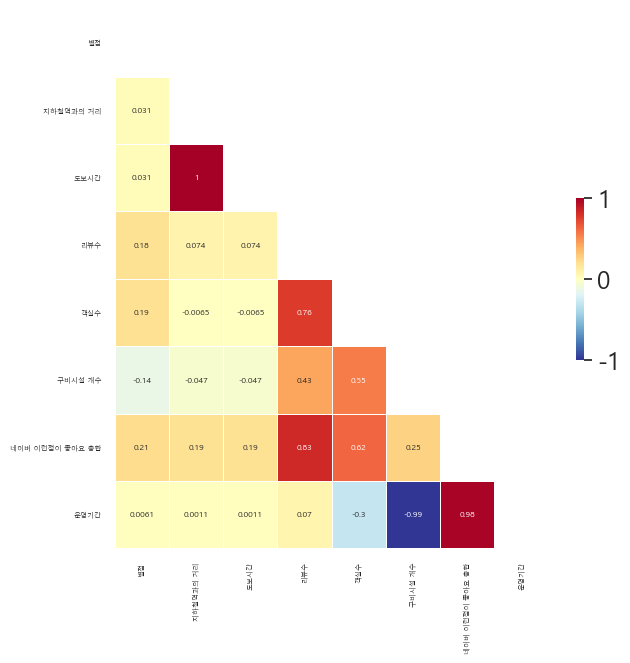

In [10]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)

sns.set(style='white', font_scale=1.6,
        #font="AppleGothic", 
        font='Malgun Gothic',
        rc={"axes.unicode_minus":False})

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cor_matrix, bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cor_matrix, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={"size": 6}
           )  
#plt.show()


In [11]:
select_continuos2 = ['별점','리뷰수','객실수','네이버 이런점이 좋아요 총합']
sel_naver2 = naver_df[select_continuos2]

c:\Python38\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
c:

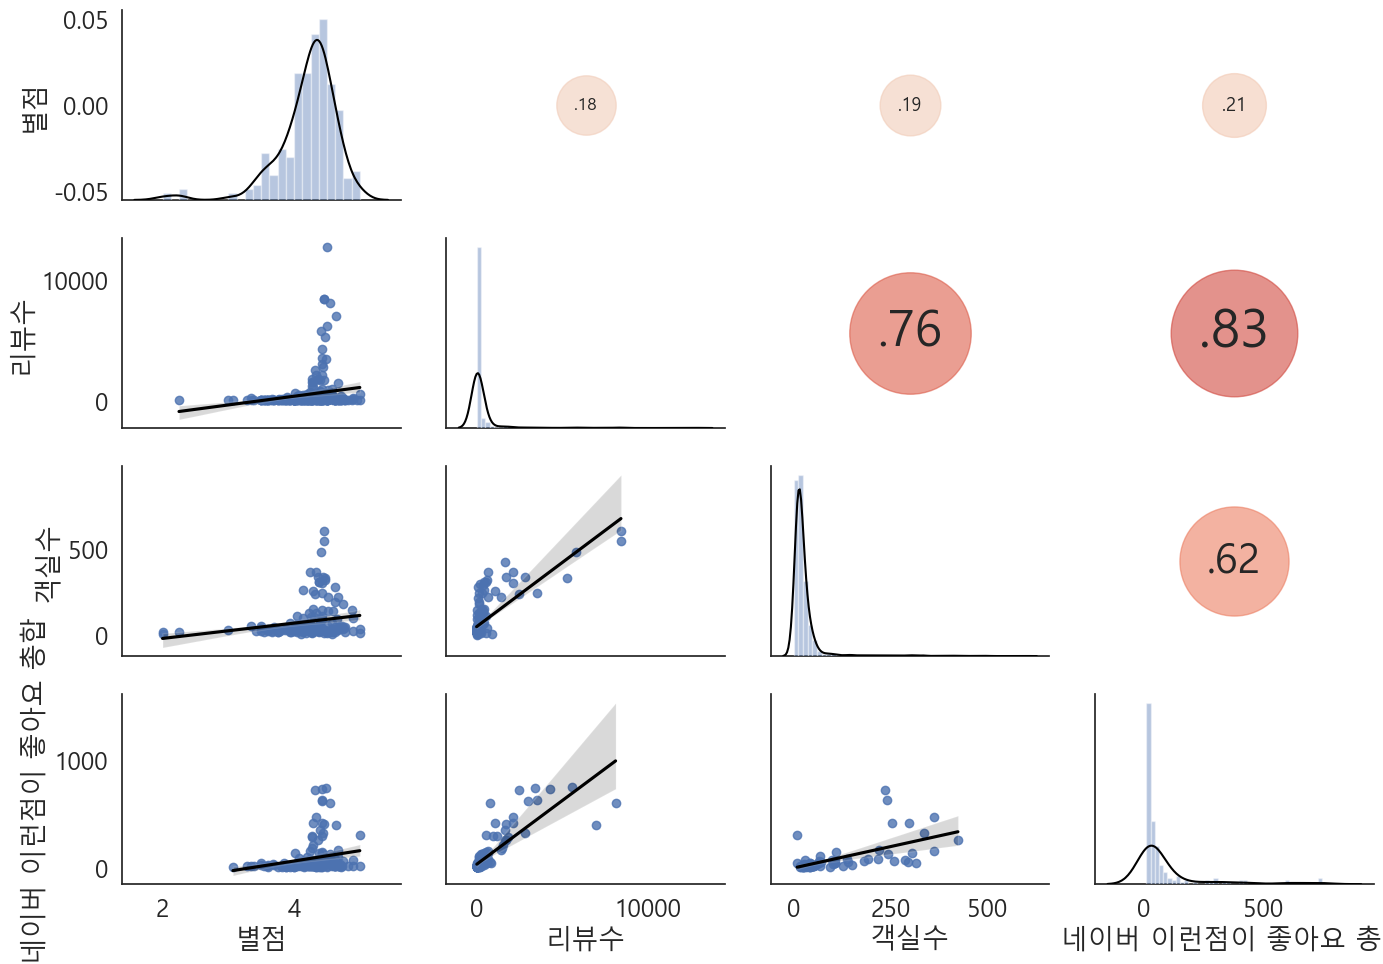

In [12]:
#fig, ax = plt.subplots( figsize=(7,7) )
sns.set(style='white', font_scale=1.6,
        #font="AppleGothic", 
        font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})
g = sns.PairGrid(sel_naver2, aspect=1.4, diag_sharey=False)
#g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
#ax.axhline(y=100)
g.map_lower(sns.regplot, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)



C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2012\324892733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel1.dropna(inplace=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2012\324892733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2.dropna(inplace=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2012\324892733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3.dropna(inplace=True)


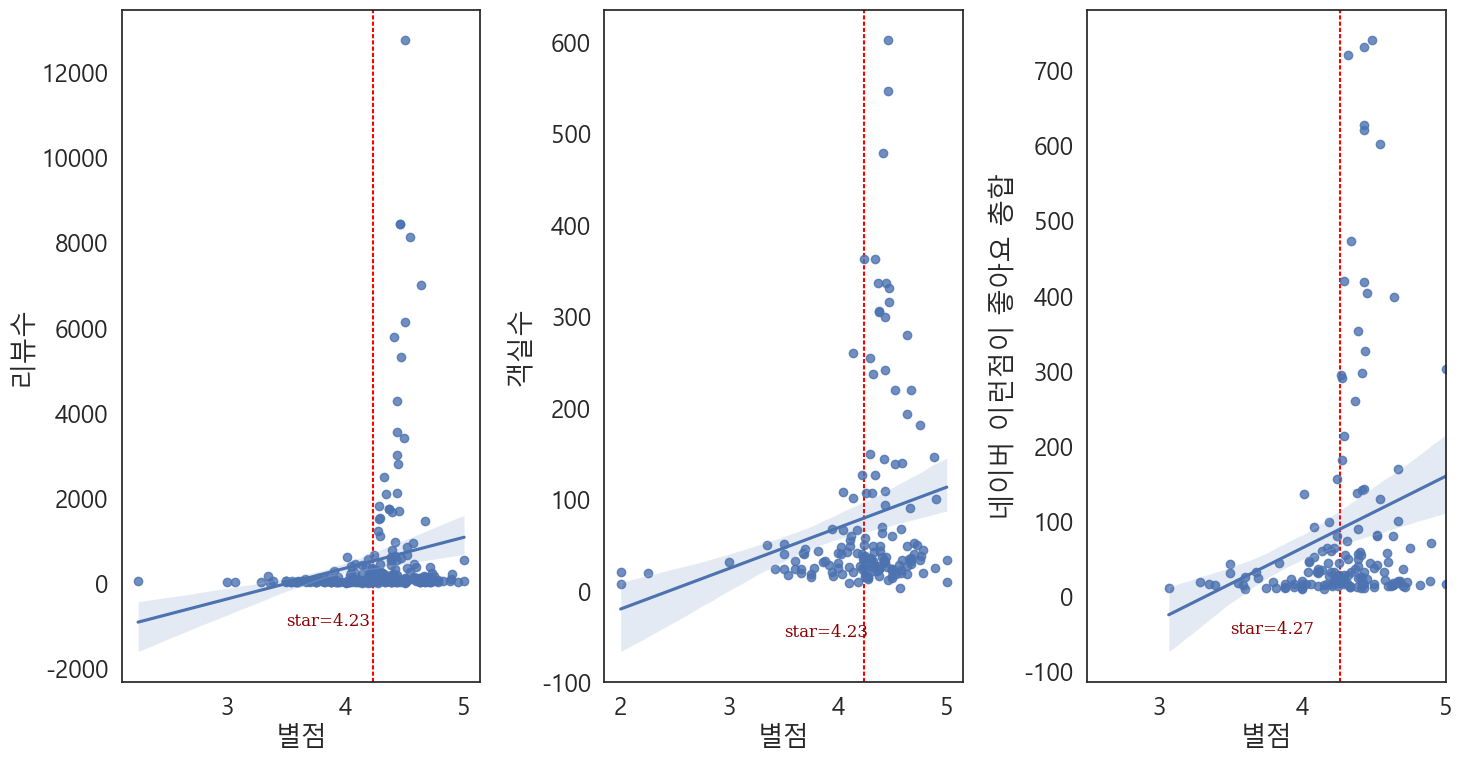

In [13]:
# 개별 scatter plot
fig, ax = plt.subplots(1, 3, figsize=(15, 8))


sel1 = sel_naver2[['리뷰수','별점']]
sel1.dropna(inplace=True)
sel2 = sel_naver2[['객실수','별점']]
sel2.dropna(inplace=True)
sel3 = sel_naver2[['네이버 이런점이 좋아요 총합','별점']]
sel3.dropna(inplace=True)

font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 12}


g1 = sns.regplot(x=sel1['별점'], y=sel1['리뷰수'], ax=ax[0])
ax[0].axvline(x=sel1['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0].text(3.5, -1000, f'star={sel1["별점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g2 = sns.regplot(x=sel2['별점'], y=sel2['객실수'], ax=ax[1])
ax[1].axvline(x=sel2['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1].text(3.5, -50, f'star={sel1["별점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g3 = sns.regplot(x=sel3['별점'], y=sel3['네이버 이런점이 좋아요 총합'], ax=ax[2])
ax[2].axvline(x=sel3['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[2].text(3.5, -50, f'star={sel3["별점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

fig.tight_layout()


In [14]:
# 각 항목별 평균 별점 기준 평균 차이 구하기
sel1_cond_up = sel1['별점'] >= sel1['별점'].mean()
sel2_cond_up = sel2['별점'] >= sel2['별점'].mean()
sel3_cond_up = sel3['별점'] >= sel3['별점'].mean()
sel1_cond_down = sel1['별점'] < sel1['별점'].mean()
sel2_cond_down = sel2['별점'] < sel2['별점'].mean()
sel3_cond_down = sel3['별점'] < sel3['별점'].mean()

sel1_cond_up_mean = sel1['리뷰수'][sel1_cond_up].mean()
sel2_cond_up_mean = sel2['객실수'][sel2_cond_up].mean()
sel3_cond_up_mean = sel3['네이버 이런점이 좋아요 총합'][sel3_cond_up].mean()
sel1_cond_down_mean = sel1['리뷰수'][sel1_cond_down].mean()
sel2_cond_down_mean = sel2['객실수'][sel2_cond_down].mean()
sel3_cond_down_mean = sel3['네이버 이런점이 좋아요 총합'][sel3_cond_down].mean()

data_mean = [[sel1_cond_up_mean, sel1_cond_down_mean],
             [sel2_cond_up_mean, sel2_cond_down_mean],
             [sel3_cond_up_mean, sel3_cond_down_mean]]
df_diff_mean = pd.DataFrame(data=data_mean, index=['리뷰수','객실수','이런점이좋아요합'], columns=['up','down'])
df_diff_mean['diff'] = df_diff_mean['up'] - df_diff_mean['down']
df_diff_mean

,up,down,diff
리뷰수,828.966216,90.571429,738.394788
객실수,98.319588,47.285714,51.033873
이런점이좋아요합,131.850575,32.828125,99.022450


In [15]:
# 차이가 무의미 할수도 있음, 4.2기준으로 폭발적으로 증가했기 때문에
# 유의미한 차이인지 검증
import scipy.stats as stats
t_stat1, p_val1 = stats.ttest_ind(sel1['리뷰수'][sel1_cond_up], sel1['리뷰수'][sel1_cond_down])
t_stat2, p_val2 = stats.ttest_ind(sel2['객실수'][sel2_cond_up], sel2['객실수'][sel2_cond_down])
t_stat3, p_val3 = stats.ttest_ind(sel3['네이버 이런점이 좋아요 총합'][sel3_cond_up], sel3['네이버 이런점이 좋아요 총합'][sel3_cond_down])

In [16]:
print(f'{t_stat1}, {p_val1:.7f}')
print(f'{t_stat2}, {p_val2:.7f}')
print(f'{t_stat3}, {p_val3:.7f}')

3.9918284026785127, 0.0000861
2.9031021113193733, 0.0042490
4.162710135198399, 0.0000530


In [18]:
import statsmodels.api as sm
 
#define response variable
sel_naver3 = sel_naver2.dropna()
print(sel_naver3)
x = sel_naver3[['객실수','리뷰수','네이버 이런점이 좋아요 총합']]
print(x.info())

#define predictor variables
y = sel_naver3['별점'].values
#print(y.info())
 
#add constant to predictor variables
x = sm.add_constant(x)
 
#fit linear regression model
model = sm.OLS(y, x).fit()
 
#view model summary
model.summary()



        별점     리뷰수    객실수  네이버 이런점이 좋아요 총합
315   4.70   135.0   52.0             14.0
319   4.43  2118.0  299.0            418.0
320   4.29  1107.0  254.0            419.0
359   4.14   217.0  101.0             35.0
361   4.24   664.0  363.0            156.0
...    ...     ...    ...              ...
5085  4.10    88.0   26.0             33.0
5087  4.17    71.0   41.0             16.0
5141  4.29    40.0   36.0             17.0
5143  3.88    23.0   32.0             11.0
5232  4.29    83.0   30.0             25.0

[70 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 315 to 5232
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   객실수              70 non-null     float64
 1   리뷰수              70 non-null     float64
 2   네이버 이런점이 좋아요 총합  70 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB
None


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5995
Date:                Mon, 22 May 2023   Prob (F-statistic):              0.618
Time:                        12:03:04   Log-Likelihood:                -20.840
No. Observations:                  70   AIC:                             49.68
Df Residuals:                      66   BIC:                             58.67
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2663      0.058     73.300      0.000       4.150       4.383
객실수                 0.0003      0.001      0.489      0.627      -0.001       0.001
리뷰수             -2.923e-05      0.000     -0.189      0.851      -0.000       0.000
네이버 이런점이 좋아요 총합     0.0004      0.001      0.517      0.607      -0.001       0.002
==============================================================================
Omnibus:                        2.859   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.056
Skew:                          -0.359   Prob(JB):                        0.358
Kurtosis:                       3.434   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""